# Libraries and Data

In [57]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.model_selection import ParameterGrid

In [59]:
import pkg_resources

# Lista de bibliotecas que você quer incluir
bibliotecas_desejadas = ['numpy', 'pandas', 'scikit-learn','matplotlib', 'statsmodels' ]  # Exemplo

# Obter todas as bibliotecas instaladas
installed_packages = {pkg.key: pkg.version for pkg in pkg_resources.working_set}

# Abrir arquivo requirements.txt para escrita
with open('requirements.txt', 'w') as f:
    for biblioteca in bibliotecas_desejadas:
        # Verifica se a biblioteca está instalada
        if biblioteca in installed_packages:
            # Escrever o pacote com a versão no formato esperado
            f.write(f"{biblioteca}=={installed_packages[biblioteca]}\n")
        else:
            print(f"A biblioteca {biblioteca} não está instalada.")

print("Arquivo requirements.txt gerado com sucesso!")

Arquivo requirements.txt gerado com sucesso!


In [60]:
# ler bike sharing dataset
df = pd.read_csv("data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [61]:
# visão geral do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [62]:
# mudandado nome das varíaveis
# o prophet exige que a varívael target se chame "y" e da as datas "ds"
df = df.rename(columns = {'cnt': 'y', 'dteday': 'ds'}) #ds=date stamp
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [63]:
# muda  'ds' para YYYY-MM-DD (formato exigido pelo prophet)
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [64]:
df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [65]:
# tratar dados de clima
###weathersit : 
###		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
###		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
###		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
###		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

# transformar a coluna categórica numérica em dummy para evitar ponderação arbitrária  

weather_dummies = pd.get_dummies(df['weathersit'], drop_first = True) #drop_fist exclui a coluna primeira categoria para evitar multicolinearidade
df = pd.concat([df, weather_dummies], axis = 1)
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False


In [66]:
# renomear 2 and 3
df = df.rename(columns = {2: 'weathersit_2', 3: 'weathersit_3'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False


In [67]:
# excluir variáveis que não será usadas
## weekday é excluído por já ter grande correlação com workingday, evitando assim multicolinearidade
df.drop(columns = ['instant', 'season', 'yr', 'mnth', 'weekday', 
                   'casual', 'registered'], inplace = True)
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False


In [68]:
type(df)

pandas.core.frame.DataFrame

In [69]:
# setar data como indice
df.set_index('ds', inplace = True)
df.index.freq='D'
df.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
ds,,,,,,,,,,
2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False
2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False
2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False
2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False
2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False


In [71]:
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='ds', length=731, freq='D')

# Análise Exploratória

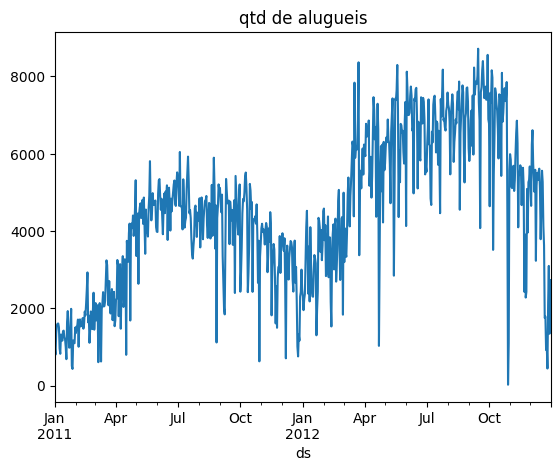

In [74]:
# plot
df['y'].plot(title = 'qtd de alugueis')
plt.show()

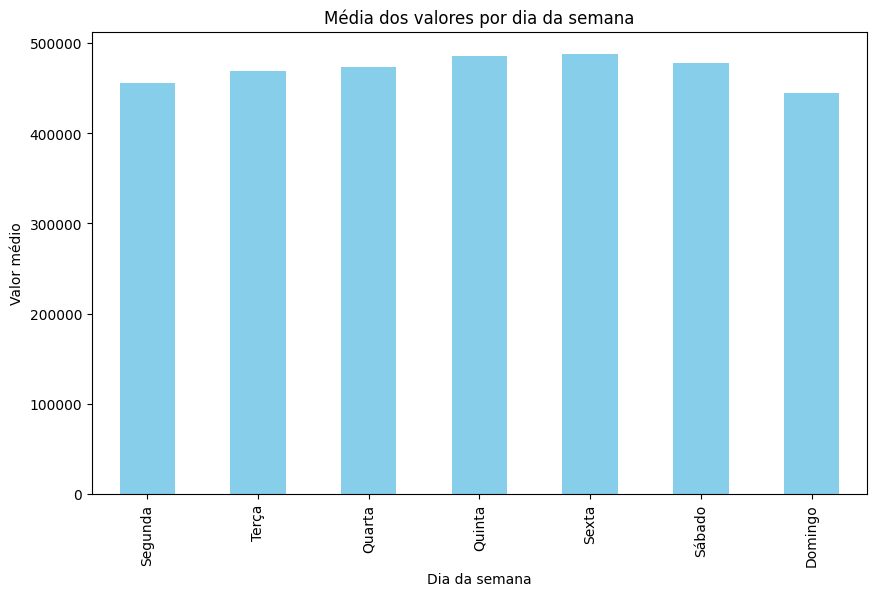

In [84]:
#plot dia da semana
df['day_of_week'] = df.index.dayofweek
df_grouped = df.groupby('day_of_week')['y'].sum()

plt.figure(figsize=(10, 6))
df_grouped.plot(kind='bar', color='skyblue')
plt.title('Média dos valores por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Valor médio')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.show()

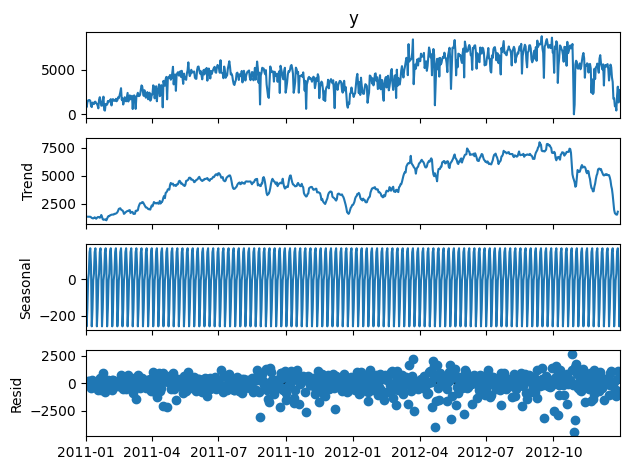

In [82]:
#decomposição da série temporal 

decomposition = seasonal_decompose(df['y'], model='additive', period=7)

# Plotando os componentes: tendência, sazonalidade e resíduo
decomposition.plot()
plt.show()

C:\Users\e702746\AppData\Local\Temp\ipykernel_9372\2807142640.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['y'].resample('M').mean(),


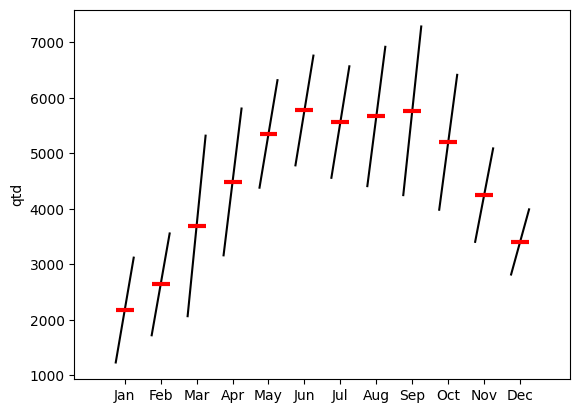

In [77]:
# plot mensal
month_plot(df['y'].resample('M').mean(),
           ylabel = 'qtd')
plt.show()

C:\Users\e702746\AppData\Local\Temp\ipykernel_9372\3882122783.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['y'].resample('Q').mean(),


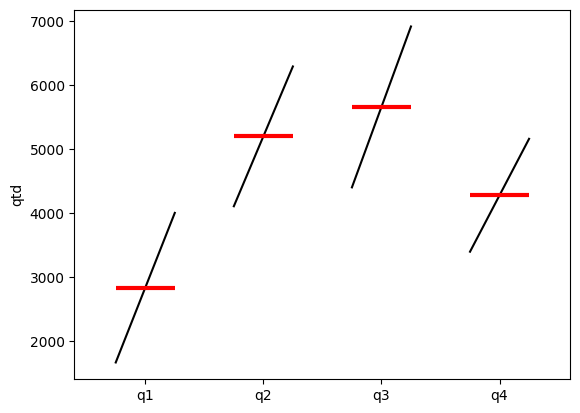

In [78]:
# plot trimestral
quarter_plot(df['y'].resample('Q').mean(),
           ylabel = 'qtd')
plt.show()

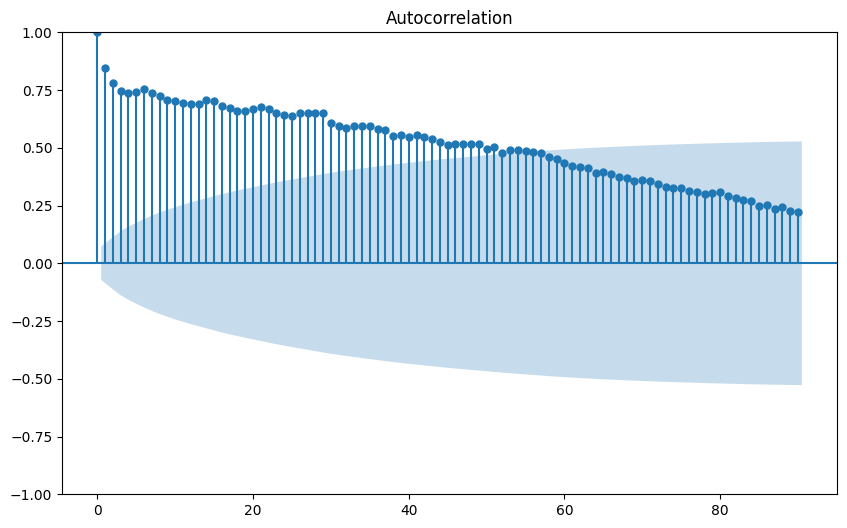

In [86]:
# autocorrelação 
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['y'], lags = 90, ax = ax)
plt.show()

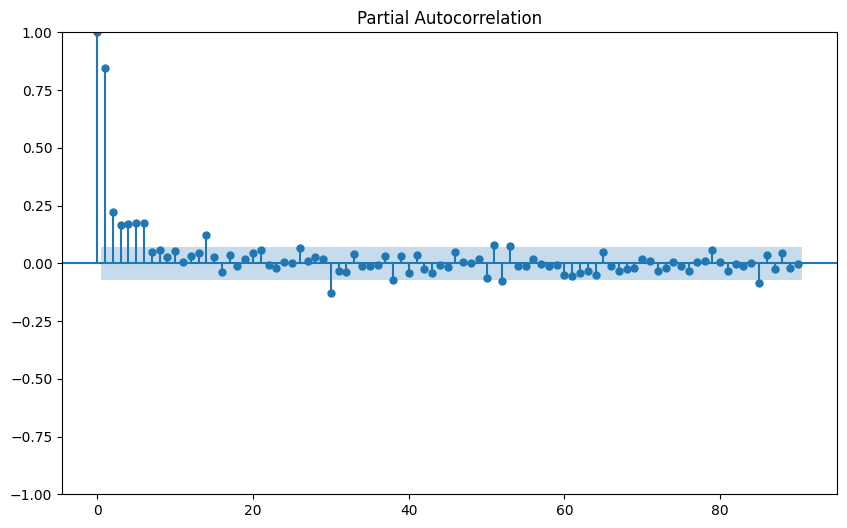

In [88]:
# autocorrelação parcial
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['y'], lags = 90, ax = ax)
plt.show()

Resample offset aliases:
- B = business day
- D = calendar day
- W = weekly
- M = month end
- BM = business month end
- MS = month start
- BMS = business month start
- Q = quarter end
- BQ = business quarter end
- QS = quarter start
- BQS = business quarter start
- A = year end
- BA = business year end
- AS = year start
- BAS = business year start
- h = hourly
- min = minutely
- s = secondly
- ms = milliseconds
- us = microseconds

# Holidays

In [ ]:
# Check the holidays in our df
df[df.holiday == 1].ds

16    2011-01-17
51    2011-02-21
104   2011-04-15
149   2011-05-30
184   2011-07-04
247   2011-09-05
282   2011-10-10
314   2011-11-11
327   2011-11-24
359   2011-12-26
366   2012-01-02
380   2012-01-16
415   2012-02-20
471   2012-04-16
513   2012-05-28
550   2012-07-04
611   2012-09-03
646   2012-10-08
681   2012-11-12
691   2012-11-22
Name: ds, dtype: datetime64[ns]

In [ ]:
# Define holiday events
# general holiday
gen_holidays = pd.DataFrame({'holiday': 'gen_holi',
                             'ds': df[df.holiday == 1].ds,
                             'lower_window': -2,
                             'upper_window': 2})
# Christmas
xmas = pd.DataFrame({'holiday': 'christmas',
                     'ds': pd.to_datetime(['2011-12-24', '2012-12-24']),
                             'lower_window': -5,
                             'upper_window': 3})
# New Year's eve
nye = pd.DataFrame({'holiday': 'new_years',
                     'ds': pd.to_datetime(['2011-12-31', '2012-12-31']),
                             'lower_window': -3,
                             'upper_window': 3})
# Easter
easter = pd.DataFrame({'holiday': 'easter',
                     'ds': pd.to_datetime(['2011-04-24', '2012-04-08']),
                     'lower_window': -3,
                             'upper_window': 3})

In [ ]:
# Combine all the holidays
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays

,holiday,ds,lower_window,upper_window
16,gen_holi,2011-01-17,-2,2
51,gen_holi,2011-02-21,-2,2
104,gen_holi,2011-04-15,-2,2
149,gen_holi,2011-05-30,-2,2
184,gen_holi,2011-07-04,-2,2
247,gen_holi,2011-09-05,-2,2
282,gen_holi,2011-10-10,-2,2
314,gen_holi,2011-11-11,-2,2
327,gen_holi,2011-11-24,-2,2
359,gen_holi,2011-12-26,-2,2


# Feature Engineering

Purpose of lagged values:
- Time series often have autocorrelation, where past values influence future values. Lagged features allow the model to learn from these historical patterns.
- Lagged values give the model information about recent trends and behaviors.
- Lags at specific intervals (e.g., 7 days, 12 months) can help capture seasonal patterns.
- Many time series are autoregressive, where future values depend on past values. Lagged features directly model this dependency.




In [ ]:
# Series.shift(n) - each value is moved to the n row(s) below its current position

# Create lagged values for the regressors 'temp' and 'atemp' with specified lags
for lag in [1,3,5,7]:
  df[f'temp_lag_{lag}'] = df['temp'].shift(lag)  # Create lagged values for 'temp'
    df[f'atemp_lag_{lag}'] = df['atemp'].shift(lag)  # Create lagged values for 'atemp'

df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1,atemp_lag_1,temp_lag_3,atemp_lag_3,temp_lag_5,atemp_lag_5,temp_lag_7,atemp_lag_7
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167,0.363625,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478,0.353739,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364,0.189405,0.344167,0.363625,NaN,NaN,NaN,NaN
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000,0.212122,0.363478,0.353739,NaN,NaN,NaN,NaN


In [ ]:
# Correlation matrix between the lagged values and y
columns = ['y'] + [f'{var}_lag_{lag}' for var in ['temp', 'atemp'] for lag in [1,3,5,7]]
df[columns].corr()

,y,temp_lag_1,temp_lag_3,temp_lag_5,temp_lag_7,atemp_lag_1,atemp_lag_3,atemp_lag_5,atemp_lag_7
y,1.000000,0.590368,0.581922,0.589976,0.595830,0.586681,0.577076,0.587374,0.591886
temp_lag_1,0.590368,1.000000,0.892245,0.861173,0.864545,0.991526,0.882663,0.847990,0.852673
temp_lag_3,0.581922,0.892245,1.000000,0.891829,0.860613,0.877489,0.991519,0.882187,0.847451
temp_lag_5,0.589976,0.861173,0.891829,1.000000,0.891432,0.848465,0.877082,0.991490,0.881814
temp_lag_7,0.595830,0.864545,0.860613,0.891432,1.000000,0.853113,0.847940,0.876584,0.991475
atemp_lag_1,0.586681,0.991526,0.877489,0.848465,0.853113,1.000000,0.869430,0.836607,0.842372
atemp_lag_3,0.577076,0.882663,0.991519,0.877082,0.847940,0.869430,1.000000,0.868989,0.836076
atemp_lag_5,0.587374,0.847990,0.882187,0.991490,0.876584,0.836607,0.868989,1.000000,0.868539
atemp_lag_7,0.591886,0.852673,0.847451,0.881814,0.991475,0.842372,0.836076,0.868539,1.000000


# Prophet Model

In [ ]:
# Look at df
df.head(1)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1,atemp_lag_1,temp_lag_3,atemp_lag_3,temp_lag_5,atemp_lag_5,temp_lag_7,atemp_lag_7
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Kick out all lagged variables but the temp_lag1
df = df.iloc[:,:-7]
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000


In [ ]:
# Remove any NAs
df = df.dropna()

In [ ]:
from prophet import Prophet

In [ ]:
# Building the Prophet model
m = Prophet(
    yearly_seasonality=True,     # Include yearly seasonality
    weekly_seasonality=True,     # Include weekly seasonality
    holidays=holidays,           # Include holiday effects
    seasonality_mode="multiplicative",  # Use multiplicative seasonality
    seasonality_prior_scale=10,  # Increase flexibility of seasonality
    holidays_prior_scale=10,     # Increase impact of holidays
    changepoint_prior_scale=0.05 # Control flexibility in detecting trend changes
)

# Add additional regressors (external factors) to the model
m.add_regressor("workingday")    # Whether it's a working day
m.add_regressor("temp")          # Temperature
m.add_regressor("atemp")         # Apparent temperature
m.add_regressor("hum")           # Humidity
m.add_regressor("windspeed")     # Wind speed
m.add_regressor("weathersit_2")  # Weather situation category 2
m.add_regressor("weathersit_3")  # Weather situation category 3
m.add_regressor("temp_lag_1")    # Temperature from previous time step

# Fit the model to the data
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk3g6rss/8os_clzu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk3g6rss/pp_iymqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67762', 'data', 'file=/tmp/tmpsk3g6rss/8os_clzu.json', 'init=/tmp/tmpsk3g6rss/pp_iymqx.json', 'output', 'file=/tmp/tmpsk3g6rss/prophet_modelu45ri0e1/prophet_model-20240423133257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:32:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:32:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
## Regressor Coefficients
# regressor_coefficients() - used to extract and display the coefficients of the additional regressors added to the Prophet model.
# Positive coefficients indicate the regressor increases the target variable.
# Negative coefficients indicate the regressor decreases the target variable.
# The value of the coefficient represents the strength of the effect.

from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,workingday,multiplicative,0.000000,1.602010,1.602010,1.602010
1,temp,multiplicative,0.502959,1.926913,1.926913,1.926913
2,atemp,multiplicative,0.481015,0.592809,0.592809,0.592809
3,hum,multiplicative,0.625459,-0.686130,-0.686130,-0.686130
4,windspeed,multiplicative,0.190577,-0.961761,-0.961761,-0.961761
5,weathersit_2,multiplicative,0.000000,-0.186123,-0.186123,-0.186123
6,weathersit_3,multiplicative,0.000000,-0.727296,-0.727296,-0.727296
7,temp_lag_1,multiplicative,0.503024,-0.956131,-0.956131,-0.956131


In [ ]:
# Function to interpret the coefficient results
def interpret_prophet_coefficients(df):
    interpretations = []

    # Iterate through each row in the DataFrame 'df'
    for _, row in df.iterrows():
        regressor = row['regressor']  # Get the regressor name
        mode = row['regressor_mode']  # Get the regressor mode (multiplicative or additive)
        coef = row['coef']  # Get the coefficient value
        effect_type = 'increase' if coef > 0 else 'decrease'  # Determine if the effect is an increase or decrease

        # Generate interpretation based on the regressor mode
        if mode == 'multiplicative':
            interpretation = f"For each unit increase in {regressor}, the target variable is expected to {effect_type} by {abs(coef) * 100:.2f}% (multiplicatively)."
        elif mode == 'additive':
            interpretation = f"For each unit increase in {regressor}, the target variable changes by {coef:.2f} units (additively)."
        else:
            interpretation = f"Regressor {regressor} has an unrecognized mode '{mode}'."

        interpretations.append(interpretation)

    return interpretations

coefs = pd.DataFrame(regressor_coefficients(m))  # Get regressor coefficients from the Prophet model
interpretations = interpret_prophet_coefficients(coefs) # Generate interpretations based on coefficients

# Print each interpretation
for interpretation in interpretations:
    print(interpretation)

For each unit increase in workingday, the target variable is expected to increase by 160.20% (multiplicatively).
For each unit increase in temp, the target variable is expected to increase by 192.69% (multiplicatively).
For each unit increase in atemp, the target variable is expected to increase by 59.28% (multiplicatively).
For each unit increase in hum, the target variable is expected to decrease by 68.61% (multiplicatively).
For each unit increase in windspeed, the target variable is expected to decrease by 96.18% (multiplicatively).
For each unit increase in weathersit_2, the target variable is expected to decrease by 18.61% (multiplicatively).
For each unit increase in weathersit_3, the target variable is expected to decrease by 72.73% (multiplicatively).
For each unit increase in temp_lag_1, the target variable is expected to decrease by 95.61% (multiplicatively).


# Cross-Validation

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
# How many days we have in the dataset
df.shape[0] -180

520

In [ ]:
# Apply the CV to the model
 df_cv = cross_validation(model = m,
                         period = '15 days',      # Step size between cutoff dates
                         initial = '521 days',    # Size of initial training period
                         horizon = '30 days',     # Forecast horizon
                         parallel ='processes')  # Use parallel processing for faster computation

INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7d05ab4f3e80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk3g6rss/fhlhao3p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk3g6rss/naeiwp6m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk3g6rss/zg838btm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk3g6rss/zkvlokmq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67171', 'data', 'file=/tmp/tmpsk3g6rss/fhlhao3p.json', 'init=/tmp/tmpsk3g6rss/zg838btm.json', 'output', 'file=/tmp/tmpsk3g6rss/prophet_modelnr1blfe4/prophet_model-20240423133303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:CmdStan args

In [ ]:
# CV output
# yhat - the predicted value (forecast) for the target variable
# yhat_lower - lower bounds of the predicted forecast
# yhat_upper - upper bounds of the predicted forecast
# y - the actual observed values of the target variable
# cutoff - defines the point in time where the validation set begins

df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-06-20,8211.163907,7521.723552,8919.018050,6211,2012-06-19
1,2012-06-21,8506.268930,7784.056572,9169.887277,5905,2012-06-19
2,2012-06-22,8146.922108,7410.145705,8859.103904,5823,2012-06-19
3,2012-06-23,7729.517448,6982.048570,8409.657232,7458,2012-06-19
4,2012-06-24,7882.652140,7210.825740,8608.668605,6891,2012-06-19


In [ ]:
# Performance Metrics
# horizon - the number of time steps (periods) into the future for which predictions are made
# mse - mean squared error
# rmse - root mean squared error
# mae - mean absolute error
# mape - mean absolute percentage error
# mdape - median absolute percentage error
# smape - symmetric mean absolute percentage error
# coverage - the proportion of observed values (y) that fall within the forecast uncertainty intervals ('yhat_lower' to 'yhat_upper').

from prophet.diagnostics import performance_metrics
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.584513e+06,1258.774602,998.187908,0.174347,0.128021,0.165991,0.500000
1,4 days,1.420931e+06,1192.028009,934.982486,0.156540,0.115193,0.151862,0.500000
2,5 days,1.467949e+06,1211.589449,967.393729,0.157573,0.112290,0.153388,0.466667
3,6 days,1.152059e+06,1073.339924,855.356281,0.133247,0.090841,0.135018,0.566667
4,7 days,1.244594e+06,1115.613571,871.987313,0.131757,0.090841,0.136773,0.600000
5,8 days,1.010415e+06,1005.193918,769.597378,0.108425,0.084938,0.116516,0.633333
6,9 days,9.616379e+05,980.631355,769.313914,0.108501,0.088907,0.115074,0.600000
7,10 days,1.399116e+06,1182.842486,891.096346,0.129370,0.091605,0.132152,0.533333
8,11 days,1.486648e+06,1219.281613,905.972119,0.135235,0.093419,0.135867,0.533333
9,12 days,1.930469e+06,1389.413221,1071.453907,0.168037,0.111842,0.171748,0.433333


In [ ]:
# RMSE and MAPE
rmse = round(performance_metrics(df_cv)['rmse'].mean(),0)
mape = round(performance_metrics(df_cv)['mape'].mean()* 100 ,2)
print(f"The RMSE is {rmse}")
print(f"The MAPE is {mape} %")

The RMSE is 1266.0
The MAPE is 16.0 %


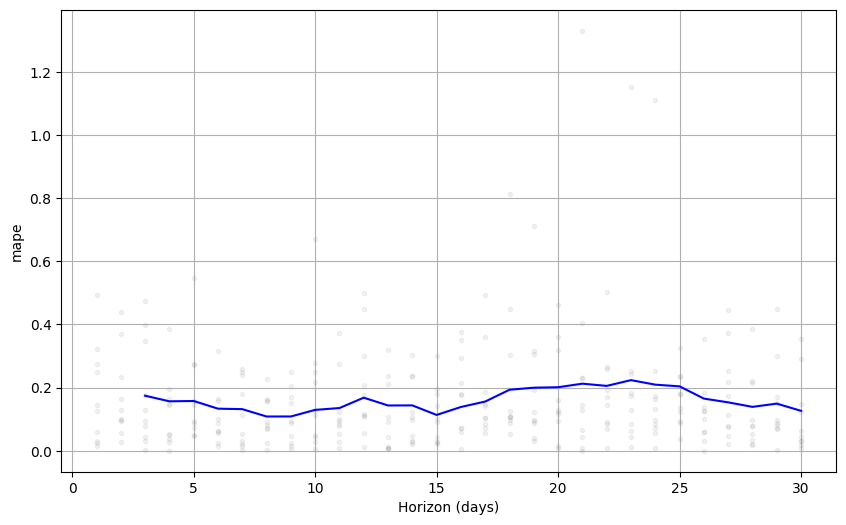

In [ ]:
# Plotting the metrics over time
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric = 'mape');

# Exploring the Error

In [ ]:
# Compute the Error / deviation
# absolute difference between predicted ('yhat') and actual ('y') values
df_cv['deviation'] = df_cv['yhat'] - df_cv['y']
# the percentage deviation of predicted from actual values
df_cv['deviation_%'] = (df_cv['yhat'] / df_cv['y'] - 1) *100

In [ ]:
# Days with the highest percentage deviation
df_cv.sort_values(by = 'deviation_%', ascending = False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
290,2012-11-22,5633.561754,4869.085963,6456.584120,2425,2012-11-01,3208.561754,132.311825
292,2012-11-24,4919.267834,4100.906713,5773.422577,2277,2012-11-01,2642.267834,116.041626
293,2012-11-25,5017.133758,4254.161562,5808.799505,2424,2012-11-01,2593.133758,106.977465
17,2012-07-07,8827.936008,8187.636055,9564.172279,4840,2012-06-19,3987.936008,82.395372
18,2012-07-08,8234.116338,7592.276831,8903.574139,4672,2012-06-19,3562.116338,76.243928
9,2012-06-29,9081.613522,8376.175858,9793.273397,5463,2012-06-19,3618.613522,66.238578
214,2012-10-07,5563.479037,4753.903979,6413.415968,3510,2012-10-02,2053.479037,58.503676
199,2012-10-07,5349.516824,4579.925715,6187.782117,3510,2012-09-17,1839.516824,52.407887
11,2012-07-01,8313.761804,7593.080483,9033.163830,5531,2012-06-19,2782.761804,50.312092
32,2012-07-07,7261.236210,6480.043005,8016.387915,4840,2012-07-04,2421.236210,50.025542


In [ ]:
# Days with the lowest deviation
df_cv.sort_values(by = 'deviation', ascending = True).head(10)

# Parameter Tuning

In [ ]:
# Define the parameter grid to search
param_grid = {
    'changepoint_prior_scale': [0.05, 0.5],
    'seasonality_prior_scale': [10, 20],
    'holidays_prior_scale': [10, 20],
    'seasonality_mode' : ['additive', 'multiplicative']
}

In [ ]:
# Generate all combinations of parameters
all_params = list(ParameterGrid(param_grid))
all_params

In [ ]:
# Placeholder for storing the results
tuning_results = []

# Build a pipeline for the Parameter Tuning
for params in all_params:

  # build the model
  m = Prophet(
      yearly_seasonality=True,
      weekly_seasonality= True,
      holidays = holidays,
      **params)
  m.add_regressor("workingday")
  m.add_regressor("temp")
  m.add_regressor("atemp")
  m.add_regressor("hum")
  m.add_regressor("windspeed")
  m.add_regressor("weathersit_2")
  m.add_regressor("weathersit_3")
  m.add_regressor("temp_lag_1")
  m.fit(df)

  # Cross-Validation
  df_cv = cross_validation(model = m,
                          period = '15 days',
                          initial = '521 days',
                          horizon = '30 days',
                          parallel ='processes')


  # Compute and Store the Error
  rmse = performance_metrics(df_cv)['rmse'].mean()
  tuning_results.append(rmse)

In [ ]:
# Parameter Tuning outcome
outcome = pd.DataFrame(all_params)
outcome['tuning_results'] = tuning_results
outcome

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,tuning_results
0,0.05,10,additive,10,983.455707
1,0.05,10,additive,20,981.355293
2,0.05,10,multiplicative,10,1266.311285
3,0.05,10,multiplicative,20,1259.899270
4,0.05,20,additive,10,983.839279
5,0.05,20,additive,20,983.028867
6,0.05,20,multiplicative,10,1261.760631
7,0.05,20,multiplicative,20,1260.901344
8,0.50,10,additive,10,1148.642004
9,0.50,10,additive,20,1150.857363


In [ ]:
# Fetch the best params
best_params = all_params[tuning_results.index(min(tuning_results))]

# Predict the future

In [ ]:
# Load the daily bike sharing training data
df_train = pd.read_csv("Daily Bike Sharing training.csv")
# Load the daily bike sharing future data
df_future = pd.read_csv("Daily Bike Sharing future.csv")

# concat both together
df = pd.concat([df_train, df_future])
df.reset_index(drop = True, inplace = True)
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,NaN,NaN,NaN
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,NaN,NaN,NaN
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,NaN,NaN,NaN
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,NaN,NaN,NaN
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,NaN,NaN,NaN


In [ ]:
# Information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      701 non-null    float64
 14  registered  701 non-null    float64
 15  cnt         701 non-null    float64
dtypes: float64(7), int64(8), object(1)
memory usage: 91.5+ KB


In [ ]:
# Change the time Series variable name
# target variable as 'y'
# date as 'ds'
df = df.rename(columns = {'cnt': 'y',
                          'dteday': 'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [ ]:
# Change 'ds' into format YYYY-MM-DD
df['ds'] = pd.to_datetime(df['ds'], format = "%m/%d/%Y")
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [ ]:
# Prepare the weather situation variable

# Create dummy variables for the categorical column 'weathersit' in DataFrame 'df'
# 'drop_first=True' drops the first category
weather_sit = pd.get_dummies(df['weathersit'], drop_first = True)

# Concatenate the original DataFrame 'df' with the dummy variables 'weather_sit'
df = pd.concat([df, weather_sit], axis = 1)
df.head(0)

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3


In [ ]:
# Renaming variables 2 and 3
df = df.rename(columns = {2: 'weathersit_2',
                          3: 'weathersit_3'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,False,False


In [ ]:
# Drop Variables That Are Not Needed
df.drop(columns = ['instant', 'season', 'yr', 'mnth', 'weekday',
                   'casual', 'registered'], inplace = True)
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985.0,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801.0,True,False
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349.0,False,False
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562.0,False,False
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600.0,False,False


In [ ]:
# Replace 29/30 of October 2012 with the values of 28th
# 28th because in EDA weekly seasonality is not obvious
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29', 'y'] = to_replace
df.loc[df.ds == '2012-10-30', 'y'] = to_replace

In [ ]:
# Define holiday events
# general holiday
gen_holidays = pd.DataFrame({'holiday': 'gen_holi',
                             'ds': df[df.holiday == 1].ds,
                             'lower_window': -2,
                             'upper_window': 2})
# Christmas
xmas = pd.DataFrame({'holiday': 'christmas',
                     'ds': pd.to_datetime(['2011-12-24', '2012-12-24']),
                             'lower_window': -5,
                             'upper_window': 3})
# New Year's Eve
nye = pd.DataFrame({'holiday': 'new_years',
                     'ds': pd.to_datetime(['2011-12-31', '2012-12-31']),
                             'lower_window': -3,
                             'upper_window': 3})
# Easter
easter = pd.DataFrame({'holiday': 'easter',
                     'ds': pd.to_datetime(['2011-04-24', '2012-04-08']),
                     'lower_window': -3,
                             'upper_window': 3})

In [ ]:
# Combine all the holidays
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays

,holiday,ds,lower_window,upper_window
16,gen_holi,2011-01-17,-2,2
51,gen_holi,2011-02-21,-2,2
104,gen_holi,2011-04-15,-2,2
149,gen_holi,2011-05-30,-2,2
184,gen_holi,2011-07-04,-2,2
247,gen_holi,2011-09-05,-2,2
282,gen_holi,2011-10-10,-2,2
314,gen_holi,2011-11-11,-2,2
327,gen_holi,2011-11-24,-2,2
359,gen_holi,2011-12-26,-2,2


In [ ]:
# Creating lagged values for the regressors
lag = 1
df[f'temp_lag_{lag}'] = df['temp'].shift(lag)
df.head(1)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985.0,True,False,NaN


# Prophet Model

In [ ]:
# Just the train data (excluding last 30 points)
train = df.iloc[:-30]

In [ ]:
# Remove any NAs
train = train.dropna()

In [ ]:
# Building the Prophet model
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality= True,
    holidays = holidays,
    **best_params)
m.add_regressor("workingday")
m.add_regressor("temp")
m.add_regressor("atemp")
m.add_regressor("hum")
m.add_regressor("windspeed")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.add_regressor("temp_lag_1")
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk3g6rss/fhmbtlve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsk3g6rss/7upyt_cv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45545', 'data', 'file=/tmp/tmpsk3g6rss/fhmbtlve.json', 'init=/tmp/tmpsk3g6rss/7upyt_cv.json', 'output', 'file=/tmp/tmpsk3g6rss/prophet_model4yg5ssu_/prophet_model-20240423151112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Forecasting

In [ ]:
# Drop columns 'ds' and 'y' from DataFrame df to create future_regressors
future_regressors = df.drop(columns = ['ds', 'y'])
# Drop rows with missing values (NaNs) from future_regressors
future_regressors = future_regressors.dropna()
# Reset the index
future_regressors.reset_index(drop = True, inplace = True)

In [ ]:
# Create a future dataframe using Prophet's make_future_dataframe method
future = m.make_future_dataframe(periods = 30)
# Concatenate future dataframe with future_regressors along axis 1 (columns)
future = pd.concat([future, future_regressors], axis = 1)

In [ ]:
# Using the Prophet model to generate predictions for future timestamps
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,atemp,...,workingday,workingday_lower,workingday_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
725,2012-12-27,6537.670182,2087.600650,3791.172815,6536.966652,6538.278692,-3556.512753,-3556.512753,-3556.512753,-346.737455,...,646.116958,646.116958,646.116958,-499.148693,-499.148693,-499.148693,0.0,0.0,0.0,2981.157429
726,2012-12-28,6543.759404,3647.690540,5424.542191,6543.016325,6544.440123,-2012.798243,-2012.798243,-2012.798243,-308.019753,...,646.116958,646.116958,646.116958,-511.577101,-511.577101,-511.577101,0.0,0.0,0.0,4530.961162
727,2012-12-29,6549.848627,3371.035965,5063.219599,6549.056806,6550.571972,-2382.767246,-2382.767246,-2382.767246,-325.257609,...,0.000000,0.000000,0.000000,-524.039424,-524.039424,-524.039424,0.0,0.0,0.0,4167.081381
728,2012-12-30,6555.937850,3364.862007,5099.233989,6555.102507,6556.703758,-2312.038184,-2312.038184,-2312.038184,-339.842858,...,0.000000,0.000000,0.000000,-536.183595,-536.183595,-536.183595,0.0,0.0,0.0,4243.899666
729,2012-12-31,6562.027072,2328.012833,4027.826856,6561.104785,6562.836636,-3349.828949,-3349.828949,-3349.828949,-351.038059,...,646.116958,646.116958,646.116958,-547.686374,-547.686374,-547.686374,0.0,0.0,0.0,3212.198123


# Data Viz with ChatGPT

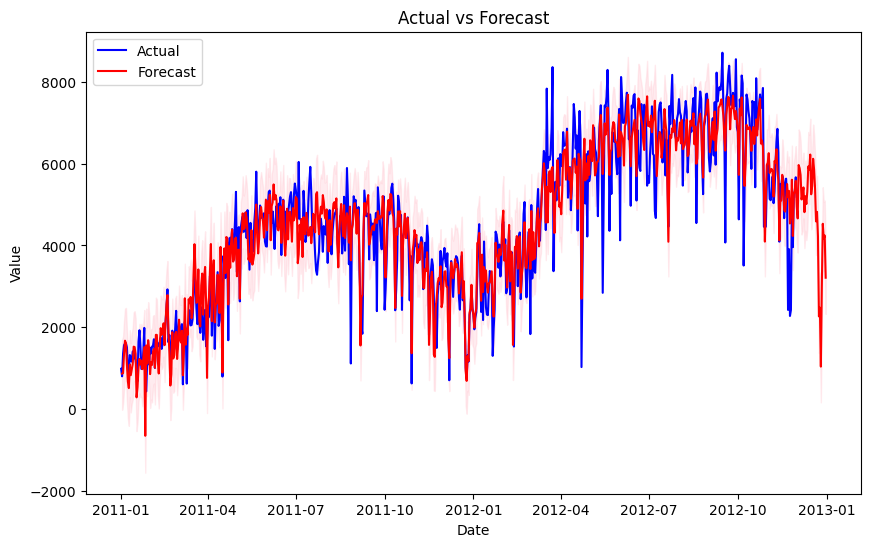

In [ ]:
# Visualize time series plot
plt.figure(figsize=(10, 6))
# Plot actual and forecasted values
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
# Fill the uncertainty interval (between yhat_lower and yhat_upper) with a pink color
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
# add title, xlabel, ylabel, legend
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

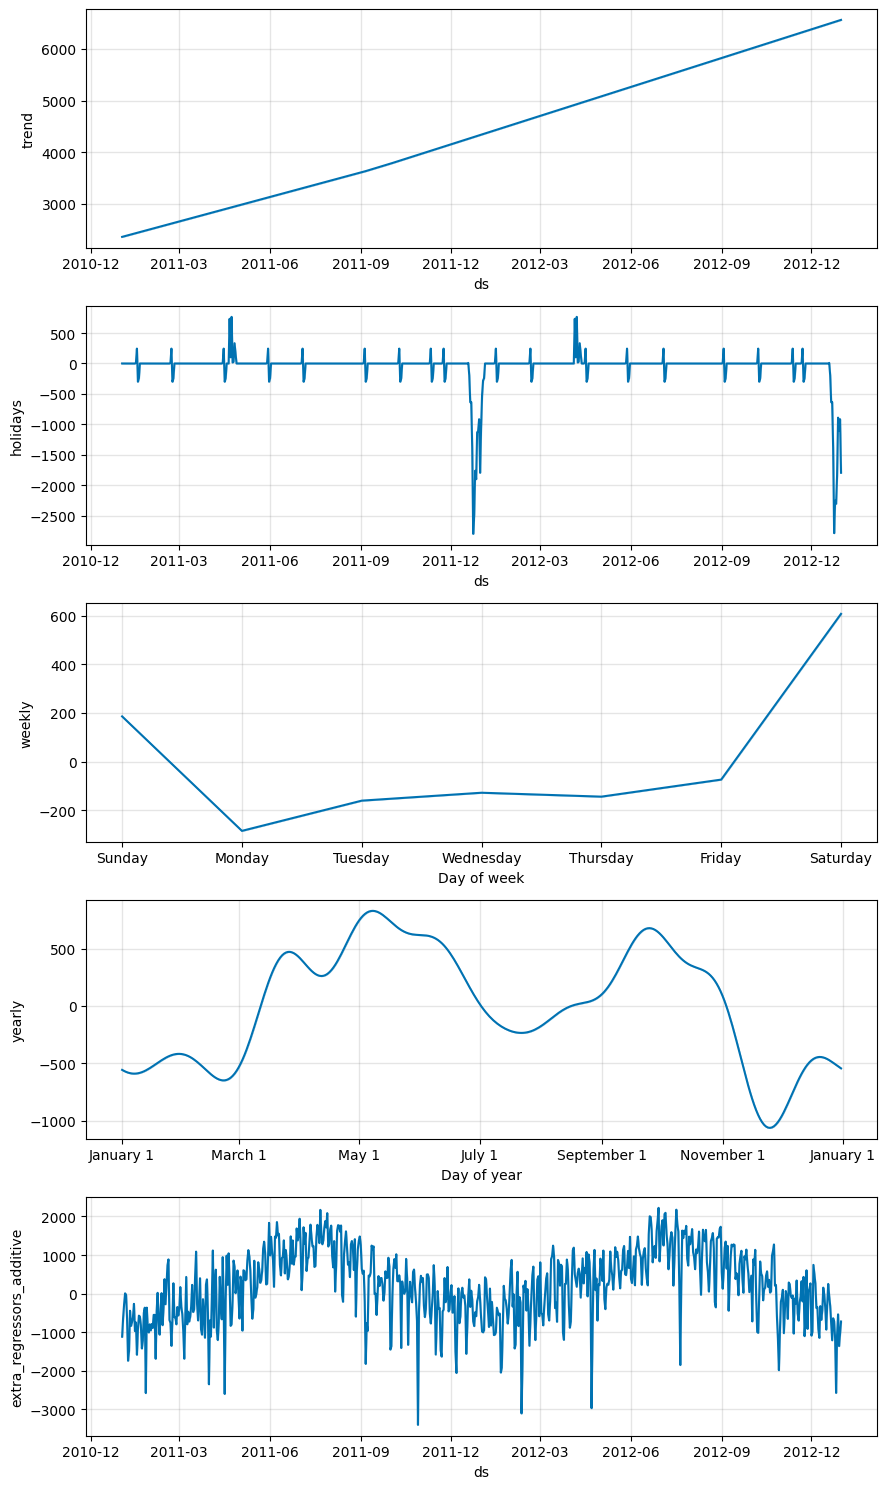

In [ ]:
# Visualize components plot
# 1. Trend: Shows the overall trend of the time series over time.
# 2. Holidays : Shows the effect of holidays on the forecast.
# 3. Weekly Seasonality: Shows patterns that repeat weekly.
# 4. Yearly Seasonality: Displays patterns that repeat annually.
# 4. Other Regressors: Displays the impact of additional regressors added to the model.
m.plot_components(forecast)
plt.show()

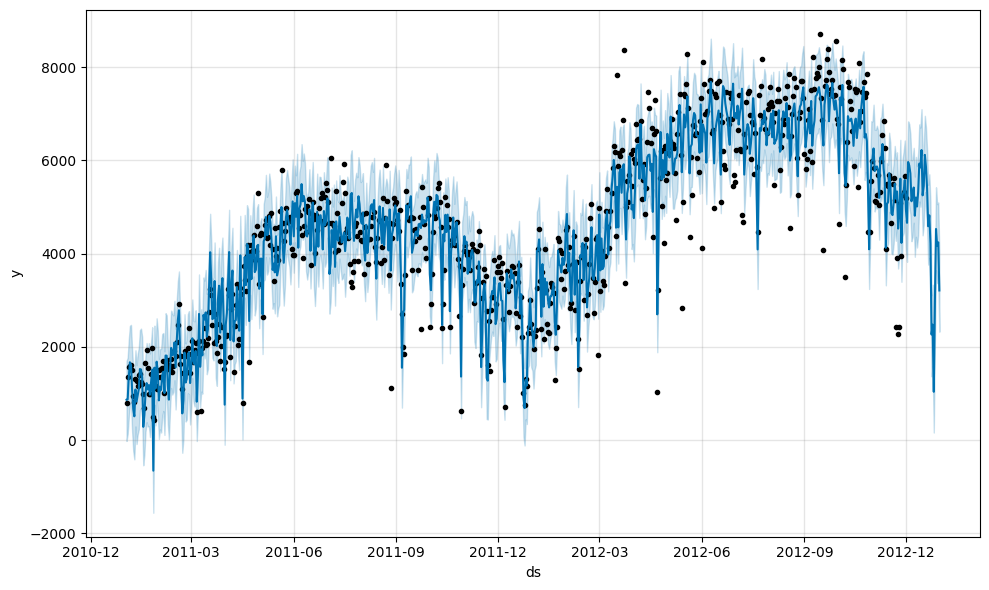

In [ ]:
# Visualize forecast plot with uncertainty bounds
m.plot(forecast)
plt.show()

In [ ]:
# Interactive visualization (using Plotly)
from prophet.plot import plot_plotly
import plotly.offline as py

# Use Prophet's plot_plotly function to generate an interactive plotly figure
fig = plot_plotly(m, forecast)
# Use Plotly's offline mode to display the interactive plotly figure
py.iplot(fig)